## This script contains the following points:

1. Question 1: Import libraries and merged data set.

2. Question 2: Address PII data.

3. Question 3: Create a regional segmentation of the data using a “Region” column based on the “State” column from the customers data set. Determine differences in spending habits between the different U.S. regions by crossing the region variable with the spending flag.

4. Question 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export sample.

5. Export updated data set. See code continuation in subsequent notebook CareerFoundry 4.10 Part 1.2.

## 1. Import libraries and merged data set.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Turn project folder path into a string.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 4-Python\11-2023 Instacart Basket Analysis'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 4-Python\\11-2023 Instacart Basket Analysis'

In [3]:
# Import orders_products_all dataframe from Exercise 4.9.1.

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check output.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        object  
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_days                   object  
 16  busiest_period_of_day          object  
 17  max_order                

In [5]:
# Define the mapping of department_id to department names.

department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [6]:
# Create a new column "department" based on the mapping.

df['department'] = df['department_id'].map(department_mapping)

In [7]:
# Check output to confirm column addition.

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,department
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages


## 2. Address PII data.

In [8]:
# Check data columns to assess personally identifiable information.

df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'department'],
      dtype='object')

In [9]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,department
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages


In [10]:
# Create scrubbed dataframe without first_name and last_name columns.

df = df.drop(columns = ['first_name', 'last_name'])

In [11]:
# Check output.

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,department
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages


## 3. Create a regional segmentation of the data using a “Region” column based on the “State” column from the customers data set. Determine differences in spending habits between the different U.S. regions by crossing the region variable with the spending flag.

In [12]:
# Create a for-loop for regions based on Wikipedia Census Bureau-designated areas.

result = []

for value in df['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')

In [13]:
# Check the output for regions.

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [14]:
# Create a "region" column with above results.

df['region'] = result

In [15]:
# Print value counts for "region" column.

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [16]:
# Add region totals to ensure it matches total number of entries in dataframe.

10791885 + 8292913 + 7597325 + 5722736

32404859

In [17]:
# Create a pivot table to cross "region" variable with "spending_flag".

regional_spending_habits = df.pivot_table(index='region', columns='spending_flag', values='order_id', aggfunc='count', fill_value=0)

In [18]:
# Check pivot table output.

regional_spending_habits.head()

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [19]:
# Define value counts for "region" column.

region_totals = df.groupby('region')['user_id'].count()

In [20]:
# Check region_totals output.

region_totals

region
Midwest       7597325
Northeast     5722736
South        10791885
West          8292913
Name: user_id, dtype: int64

In [21]:
# Normalize spending_flag counts by dividing by the total number of value counts for each region.

region_normalized = regional_spending_habits.div(region_totals, axis=0)

In [22]:
# Check normalization output.

region_normalized

spending_flag,High spender,Low spender
region,,
Midwest,0.020530,0.979470
Northeast,0.018911,0.981089
South,0.019430,0.980570
West,0.019336,0.980664


In [23]:
# Multiply region_normalized values by 100 to express the result as a percentage.

region_normalized_percent = region_normalized * 100

In [24]:
# Check output of region_normalized percentages.

region_normalized_percent

spending_flag,High spender,Low spender
region,,
Midwest,2.053025,97.946975
Northeast,1.891141,98.108859
South,1.943043,98.056957
West,1.933627,98.066373


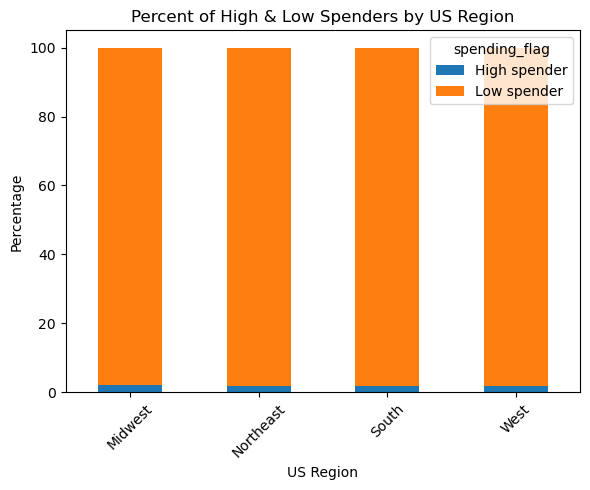

In [25]:
# Create a stacked bar chart from the region_normalized_percent results.

# Set a figure size.

fig, ax = plt.subplots(figsize=(6, 5)) 
spenders_by_region = region_normalized_percent.plot.bar(stacked=True, ax=ax)

# Add labels and a title.

plt.xlabel('US Region')
plt.ylabel('Percentage')
plt.title('Percent of High & Low Spenders by US Region')

# Rotate x-axis labels for readability.

ax.set_xticklabels(region_normalized_percent.index, rotation=45)  

# Adjust the layout to ensure everything fits.
plt.tight_layout()

# Save bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_by_region_bar.png'))

The above stacked bar chart indicates that the majority of customers are low spenders (User spending criteria: If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.” If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender"). There is little to no difference in the spending habits of customers across US regions.

## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export sample.

In [26]:
# Create an exclusion flag for customers with less than 5 orders.

df['exclusion_flag'] = np.where(df['max_order'] < 5, 'Low activity', 'Regular activity')

In [27]:
# Check output of new column.

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity


In [28]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag
32404854,156685,106143,26,4,23,5.000000,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity
32404855,484769,66343,1,6,11,11.114836,47210,1,0,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity
32404856,1561557,66343,2,1,11,30.000000,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity
32404857,276317,66343,3,6,15,19.000000,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity
32404858,2922475,66343,4,1,12,30.000000,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity


In [29]:
# Create data frame containing low-activity customers (exclusion flag = low activity).

df_exclusion = df[df['exclusion_flag'] == 'Low activity']

In [30]:
# Check output of df_exclusion.

df_exclusion.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag
1510,520620,120,1,3,11,11.114836,196,2,0,Soda,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low activity
1511,3273029,120,3,2,8,19.000000,196,2,1,Soda,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low activity
1512,520620,120,1,3,11,11.114836,46149,1,0,Zero Calorie Cola,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low activity
1513,3273029,120,3,2,8,19.000000,46149,1,1,Zero Calorie Cola,...,Kentucky,54,3/2/2017,2,married,99219,both,beverages,South,Low activity
1514,520620,120,1,3,11,11.114836,26348,3,0,Mixed Fruit Fruit Snacks,...,Kentucky,54,3/2/2017,2,married,99219,both,snacks,South,Low activity


In [31]:
df_exclusion.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag
32404828,1947537,166751,3,4,7,0.000000,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,Oregon,38,8/17/2018,1,married,41766,both,personal care,West,Low activity
32404855,484769,66343,1,6,11,11.114836,47210,1,0,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity
32404856,1561557,66343,2,1,11,30.000000,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity
32404857,276317,66343,3,6,15,19.000000,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity
32404858,2922475,66343,4,1,12,30.000000,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,meat seafood,South,Low activity


In [32]:
# Double-check exclusion_flag and determine number of values.

df_exclusion['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Low activity    1440295
Name: count, dtype: int64

In [33]:
# Export sample to csv.

df_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_five_orders.csv'))

In [34]:
# Remove low activity rows from data frame.

df = df[df['exclusion_flag'] != 'Low activity']

In [35]:
# Check output of removal.

df['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Regular activity    30964564
Name: count, dtype: int64

In [36]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity


In [37]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Hawaii,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity


In [38]:
# Add updated data frame value counts to low-activity value counts to ensure they equal the same total as original data frame.

1440295 + 30964564

32404859

## 5. Export updated data set.

In [39]:
# Export data set with low-activity customers excluded per Question 4.

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_cleaned.pkl'))